In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/Pradeep_dataset(age).csv")
df

,Age,price,Profession,Marrital Status,Education,Personal loan,Total Salary,No of Dependents
0,27,800000,Salaried,Single,Post Graduate,Yes,800000,0
1,35,1000000,Salaried,Married,Post Graduate,Yes,2000000,2
2,45,1200000,Business,Married,Graduate,Yes,1800000,4
3,41,1200000,Business,Married,Post Graduate,No,2200000,3
4,31,1600000,Salaried,Married,Post Graduate,Yes,2600000,2
...,...,...,...,...,...,...,...,...
94,27,1600000,Business,Single,Graduate,No,2400000,0
95,50,1600000,Salaried,Married,Post Graduate,No,5100000,3
96,51,1100000,Business,Married,Graduate,Yes,2200000,2
97,51,1500000,Salaried,Married,Post Graduate,No,4000000,2


In [6]:
df.head()

,Age,price,Profession,Marrital Status,Education,Personal loan,Total Salary,No of Dependents
94,27,1600000,Business,Single,Graduate,No,2400000,0
95,50,1600000,Salaried,Married,Post Graduate,No,5100000,3
96,51,1100000,Business,Married,Graduate,Yes,2200000,2
97,51,1500000,Salaried,Married,Post Graduate,No,4000000,2
98,51,1100000,Salaried,Married,Post Graduate,Yes,2200000,2


In [7]:
df.describe()

,Age,price,Total Salary,No of Dependents
count,99.000000,9.900000e+01,9.900000e+01,99.000000
mean,36.313131,1.194040e+06,2.270707e+06,2.181818
std,6.246054,4.376955e+05,1.050777e+06,1.335265
min,26.000000,1.100000e+05,2.000000e+05,0.000000
25%,31.000000,8.000000e+05,1.550000e+06,2.000000
50%,36.000000,1.200000e+06,2.100000e+06,2.000000
75%,41.000000,1.500000e+06,2.700000e+06,3.000000
max,51.000000,3.000000e+06,5.200000e+06,4.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   price             99 non-null     int64 
 2   Profession        99 non-null     object
 3   Marrital Status   99 non-null     object
 4   Education         99 non-null     object
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   No of Dependents  99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [9]:
df.rename(columns={'Personal loan':'Car_Loan'},inplace=True)
df.rename(columns={'Price':'EV_Price'},inplace=True)
df.head()

,Age,price,Profession,Marrital Status,Education,Car_Loan,Total Salary,No of Dependents
0,27,800000,Salaried,Single,Post Graduate,Yes,800000,0
1,35,1000000,Salaried,Married,Post Graduate,Yes,2000000,2
2,45,1200000,Business,Married,Graduate,Yes,1800000,4
3,41,1200000,Business,Married,Post Graduate,No,2200000,3
4,31,1600000,Salaried,Married,Post Graduate,Yes,2600000,2


In [10]:
df.columns

Index(['Age', 'price', 'Profession', 'Marrital Status', 'Education',
       'Car_Loan', 'Total Salary', 'No of Dependents'],
      dtype='object')

In [11]:
for i in df.columns:
  print(i, ':' , df[i].unique())

Age : [27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]
price : [ 800000 1000000 1200000 1600000  700000 1100000  110000 3000000 1300000
 1500000]
Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Car_Loan : ['Yes' 'No']
Total Salary : [ 800000 2000000 1800000 2200000 2600000  900000 1400000 1900000 1700000
 1300000 4500000 2500000 2400000 2900000 1600000 2700000 1100000 2100000
 3000000 3700000 2300000 3600000  200000 3100000 4300000 3800000 4700000
 1200000 1500000 4000000 3200000 5200000 4100000 4900000 2800000 5100000]
No of Dependents : [0 2 4 3]


In [12]:
df.isnull().sum()

,0
Age,0
price,0
Profession,0
Marrital Status,0
Education,0
Car_Loan,0
Total Salary,0
No of Dependents,0


**Exploratory Data Analysis**

<Axes: xlabel='Age', ylabel='Total Salary'>

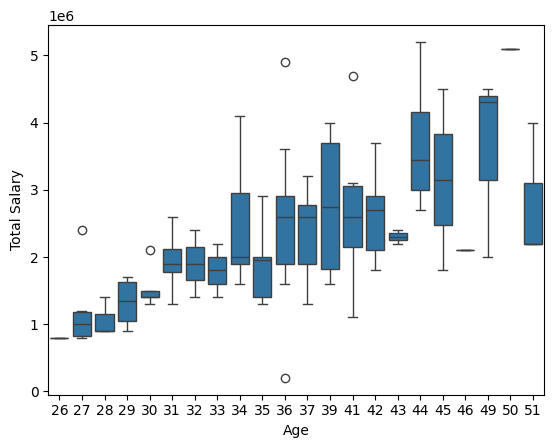

In [15]:
sns.boxplot( x = 'Age' , y= 'Total Salary', data = df)

In [16]:
print(df.columns.tolist())

['Age', 'price', 'Profession', 'Marrital Status', 'Education', 'Car_Loan', 'Total Salary', 'No of Dependents']


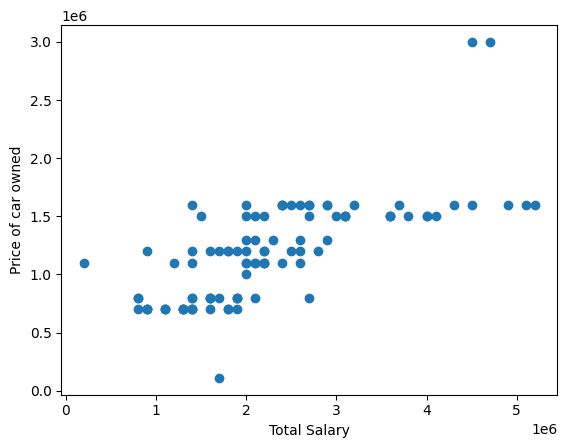

In [19]:
plt.xlabel('Total Salary')
plt.ylabel('Price of car owned')
plt.scatter(df['Total Salary'],df['price'])

In [20]:
print(df.columns.tolist())

['Age', 'price', 'Profession', 'Marrital Status', 'Education', 'Car_Loan', 'Total Salary', 'No of Dependents']


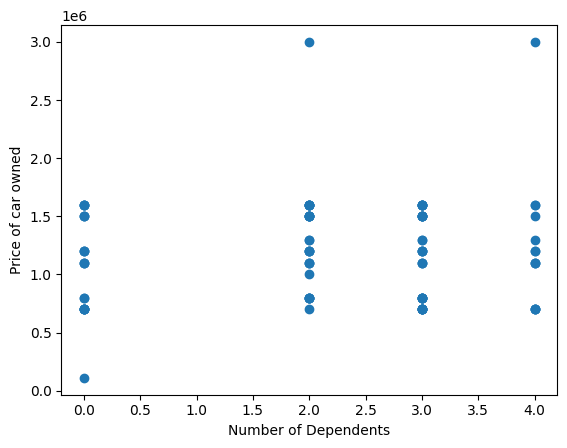

In [23]:
plt.xlabel('Number of Dependents')
plt.ylabel('Price of car owned')
plt.scatter(df['No of Dependents'],df['price'])

<Figure size 1500x700 with 0 Axes>

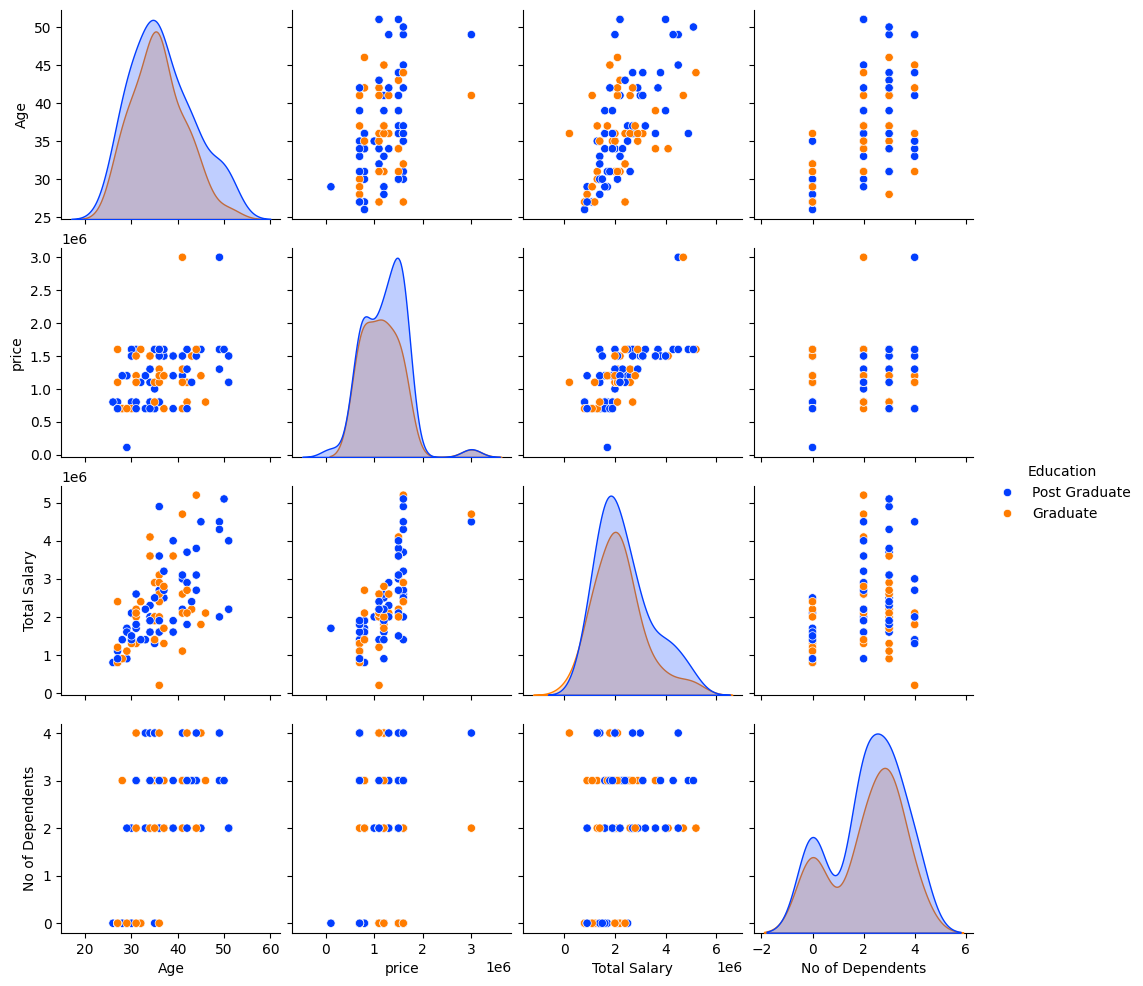

In [24]:
plt.figure(1,figsize=(15,7))
sns.pairplot(df , hue = 'Education', palette = 'bright')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   price             99 non-null     int64 
 2   Profession        99 non-null     object
 3   Marrital Status   99 non-null     object
 4   Education         99 non-null     object
 5   Car_Loan          99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   No of Dependents  99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


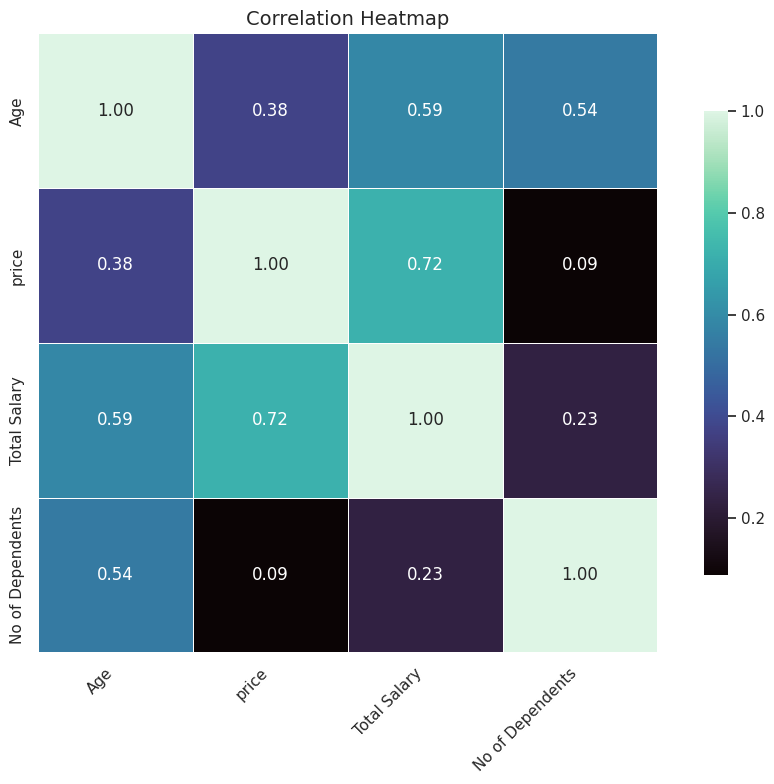

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr(numeric_only=True)


plt.figure(figsize=(10, 8))
sns.set(style="white")

heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='mako',
    square=True,
    cbar_kws={"shrink": 0.75},
    linewidths=0.5,
    linecolor='white'
)


plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df.dtypes

,0
Age,int64
price,int64
Profession,object
Marrital Status,object
Education,object
Car_Loan,object
Total Salary,int64
No of Dependents,int64


In [35]:
dfe.head()

,Age,price,Profession,Marrital Status,Education,Car_Loan,Total Salary,No of Dependents
0,27,800000,Salaried,Single,Post Graduate,Yes,800000,0
1,35,1000000,Salaried,Married,Post Graduate,Yes,2000000,2
2,45,1200000,Business,Married,Graduate,Yes,1800000,4
3,41,1200000,Business,Married,Post Graduate,No,2200000,3
4,31,1600000,Salaried,Married,Post Graduate,Yes,2600000,2


In [38]:
print(df.columns.tolist())


['Age', 'price', 'Profession', 'Marrital Status', 'Education', 'Car_Loan', 'Total Salary', 'No of Dependents']


In [39]:
from sklearn.preprocessing import LabelEncoder

# Make sure you have created a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding on multiple categorical columns
dfe['Profession'] = le.fit_transform(dfe['Profession'])
dfe['Marrital Status'] = le.fit_transform(dfe['Marrital Status'])
dfe['Education'] = le.fit_transform(dfe['Education'])
dfe['Car_Loan'] = le.fit_transform(dfe['Car_Loan'])

In [40]:
dfe.head()

,Age,price,Profession,Marrital Status,Education,Car_Loan,Total Salary,No of Dependents
0,27,800000,1,1,1,1,800000,0
1,35,1000000,1,0,1,1,2000000,2
2,45,1200000,0,0,0,1,1800000,4
3,41,1200000,0,0,1,0,2200000,3
4,31,1600000,1,0,1,1,2600000,2


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
dfe_scaled = StandardScaler().fit_transform(dfe)
dfe_scaled = pd.DataFrame(dfe_scaled,columns=['Age', 'price', 'Profession', 'Marrital Status', 'Education', 'Car_Loan', 'Total Salary', 'No of Dependents'])
x = dfe_scaled.to_numpy()
dfe_scaled

,Age,price,Profession,Marrital Status,Education,Car_Loan,Total Salary,No of Dependents
0,-1.498630,-0.904843,0.739510,2.366432,0.876275,1.446980,-1.406760,-1.642313
1,-0.211304,-0.445579,0.739510,-0.422577,0.876275,1.446980,-0.258937,-0.136859
2,1.397855,0.013685,-1.352247,-0.422577,-1.141195,1.446980,-0.450240,1.368594
3,0.754191,0.013685,-1.352247,-0.422577,0.876275,-0.691095,-0.067633,0.615867
4,-0.854967,0.932213,0.739510,-0.422577,0.876275,1.446980,0.314975,-0.136859
...,...,...,...,...,...,...,...,...
94,-1.498630,0.932213,-1.352247,2.366432,-1.141195,-0.691095,0.123671,-1.642313
95,2.202434,0.932213,0.739510,-0.422577,0.876275,-0.691095,2.706274,0.615867
96,2.363350,-0.215947,-1.352247,-0.422577,-1.141195,1.446980,-0.067633,-0.136859
97,2.363350,0.702581,0.739510,-0.422577,0.876275,-0.691095,1.654102,-0.136859


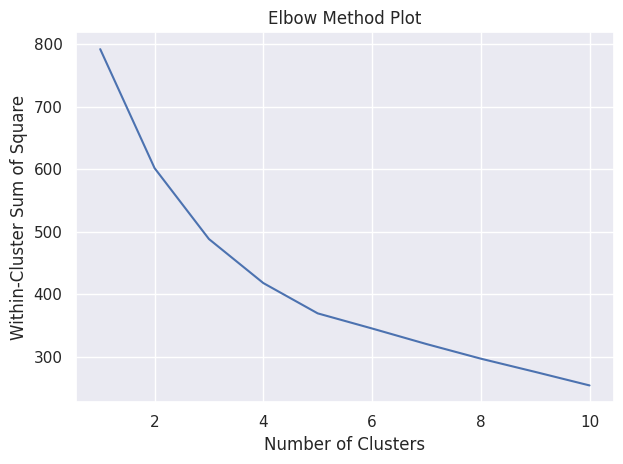

In [43]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(dfe_scaled)
    wcss.append(kmeans.inertia_)
sns.set_style("darkgrid")
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [45]:
y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)
final_data

,Age,price,Profession,Marrital Status,Education,Car_Loan,Total Salary,No of Dependents,Class
0,27,800000,Salaried,Single,Post Graduate,Yes,800000,0,2
1,35,1000000,Salaried,Married,Post Graduate,Yes,2000000,2,3
2,45,1200000,Business,Married,Graduate,Yes,1800000,4,3
3,41,1200000,Business,Married,Post Graduate,No,2200000,3,1
4,31,1600000,Salaried,Married,Post Graduate,Yes,2600000,2,3
...,...,...,...,...,...,...,...,...,...
94,27,1600000,Business,Single,Graduate,No,2400000,0,2
95,50,1600000,Salaried,Married,Post Graduate,No,5100000,3,0
96,51,1100000,Business,Married,Graduate,Yes,2200000,2,3
97,51,1500000,Salaried,Married,Post Graduate,No,4000000,2,0


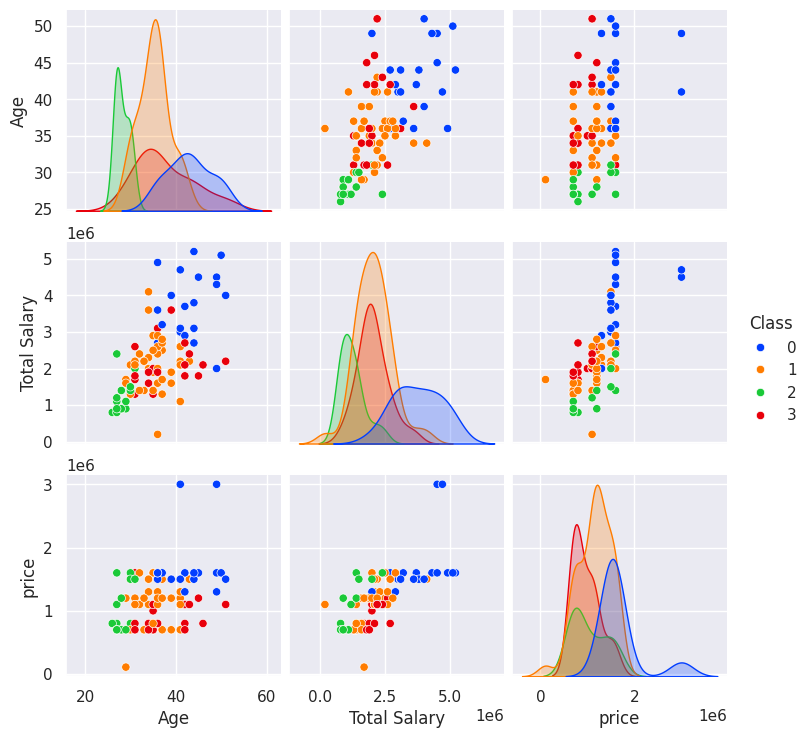

In [49]:
sns.pairplot(final_data,x_vars = ['Age','Total Salary','price'], y_vars = ['Age','Total Salary','price'], hue='Class', palette= 'bright')


In [50]:
#k = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(dfe_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [52]:
y = kmeans.predict(dfe_scaled)
y_df = pd.DataFrame(y,columns=['Class'])
final_data = pd.concat([df,y_df],axis=1)

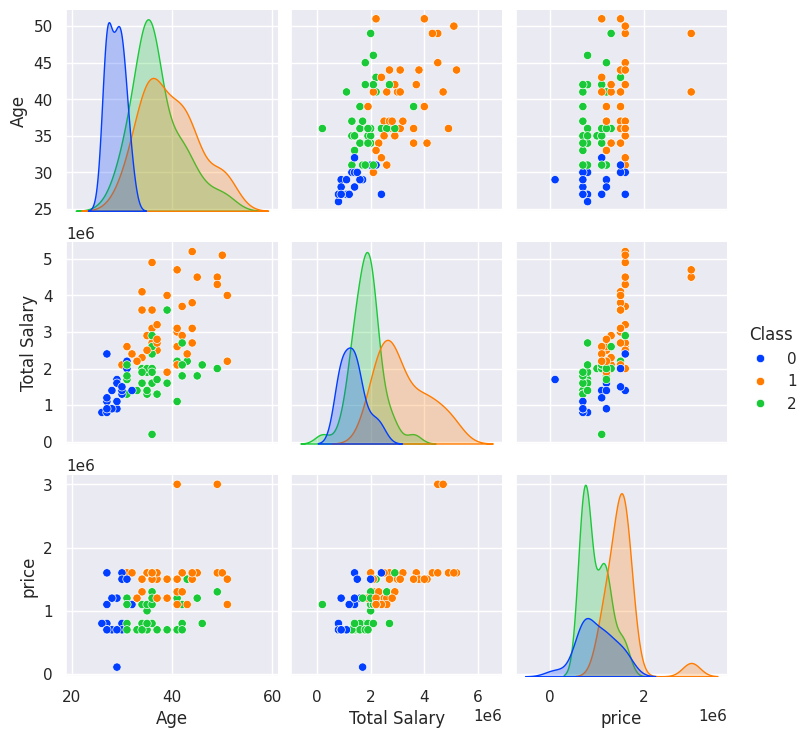

In [53]:
sns.pairplot(final_data,x_vars = ['Age','Total Salary','price'], y_vars = ['Age','Total Salary','price'], hue='Class', palette= 'bright')


Thus, we see that we can get a more meaningful analysis for k = 3 Let's see the characteristics of every cluster:

Cluster 1 (Orange): Prefer low to moderately priced Electric vehicles

Age group 20-30 Moderate to average salary Wife's salary - Low

Cluster 2 (green) : Prefer low to moderately priced Electric vehicles

Age group 30-45 Average to high salary Wife's salary - low to

Cluster 3 (Blue) : Prefer moderate priced Electric vehicles and experiment with the high priced segment.

Age group 30-45 Average to very high Wife's salary - high

**Notable findings:**

Moderately priced EVs are the most preferred across all the classes/clusters.

Most purchasing acitivity is seen in the age range of 26-38.

Regardless of even high salaries, average to low price-ranged cars are being preferred.

Personal and home loans do not seem to have any significant impact on EV purchasing patterns.

We see the people buying over a range of prices when it comes to Verna, whereas in case of other brands, probably some specefic models are being preferred.

We observe high correlation between total salary (salary + wife salary) and price.

**Additional analysis**

In [54]:
import pandas as pd

# Load CSV file
df1 = pd.read_csv('/content/EV Maker by Place.csv')

# Clean column names (remove leading/trailing spaces)
df1.columns = df1.columns.str.strip()

# Convert price to INR (10e3)
if 'PriceEuro' in df1.columns:
    df1['inr(10e3)'] = pd.to_numeric(df1['PriceEuro'], errors='coerce') * 0.08320

# Replace 'RapidCharge' values
if 'RapidCharge' in df1.columns:
    df1['RapidCharge'] = df1['RapidCharge'].replace({'No': 0, 'Yes': 1})

# Show first few rows
print(df1.head())

            EV Maker        Place        State
0        Tata Motors         Pune  Maharashtra
1  Mahindra Electric    Bengaluru    Karnataka
2       Ather Energy    Bengaluru    Karnataka
3      Hero Electric    New Delhi        Delhi
4       Ola Electric  Krishnagiri   Tamil Nadu


In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  62 non-null     object
 1   Place     62 non-null     object
 2   State     62 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [56]:
df1.isna().sum()

,0
EV Maker,0
Place,0
State,0


In [57]:
print(df1.columns)

Index(['EV Maker', 'Place', 'State'], dtype='object')


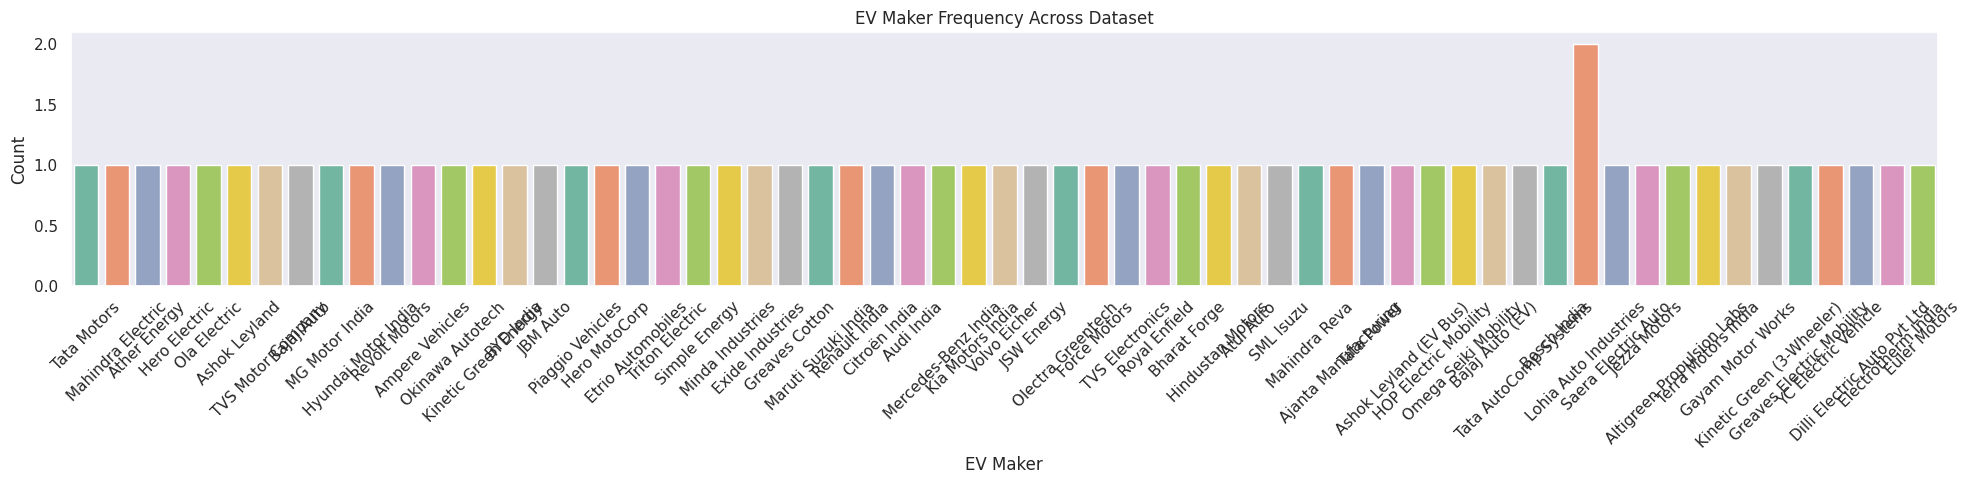

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
sns.countplot(x='EV Maker', data=df1, palette='Set2')
plt.grid(axis='y')
plt.title('EV Maker Frequency Across Dataset')
plt.xlabel('EV Maker')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

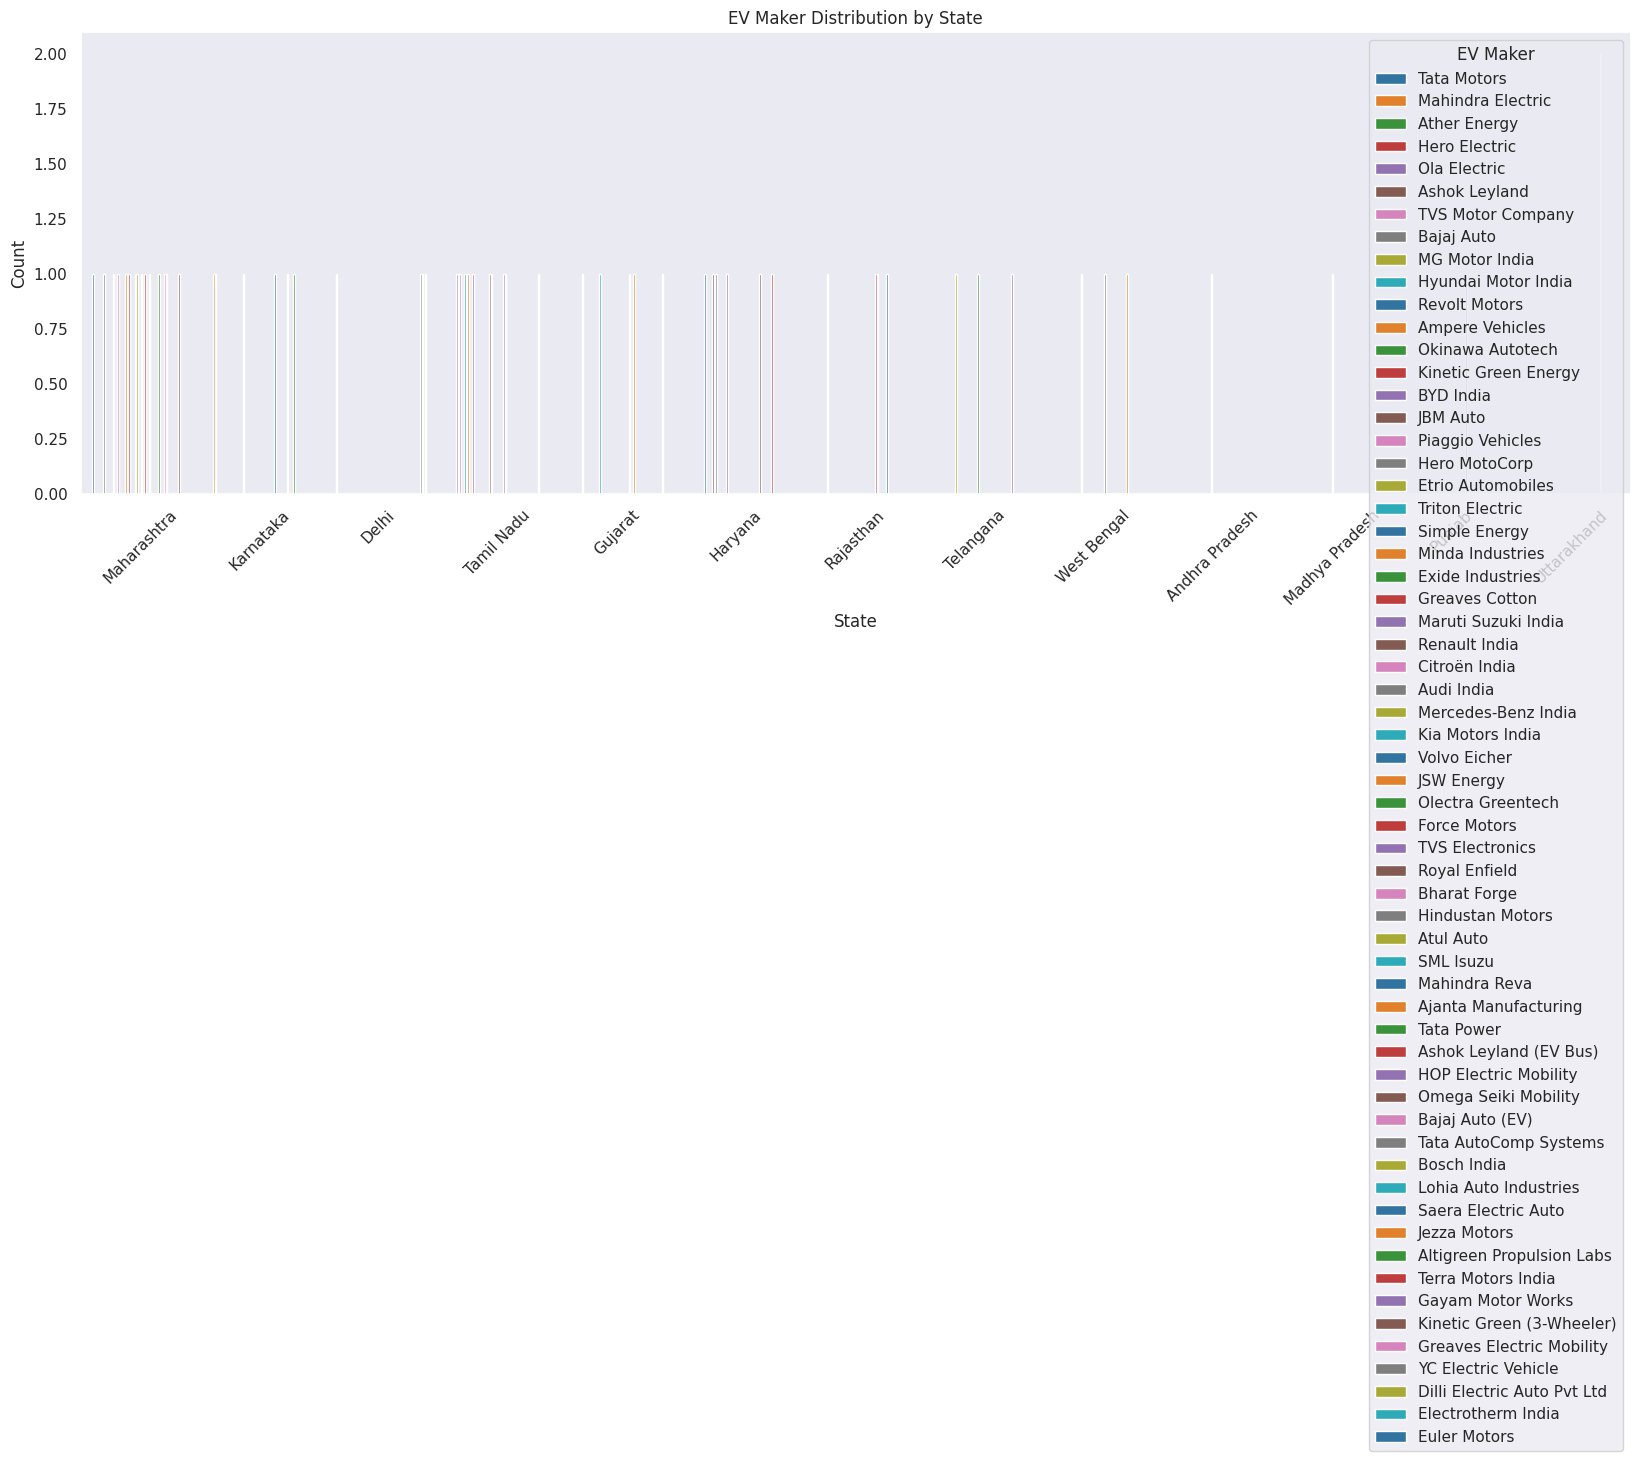

In [59]:
plt.figure(figsize=(20,6))
sns.countplot(x='State', hue='EV Maker', data=df1, palette='tab10')
plt.title('EV Maker Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()